In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name=r"C:\Users\khush\Downloads\cleandf_usedcars.csv"

In [3]:
df=pd.read_csv(file_name)
df.head(5)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel.1,fuel-type-gas.1,std,turbo,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,False,True,True,False,True,False,True,False,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,False,True,True,False,True,False,True,False,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,False,True,True,False,True,False,True,False,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,False,True,True,False,True,False,True,False,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,False,True,True,False,True,False,True,False,True,False


In [4]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


(0.0, 53358.31943361456)

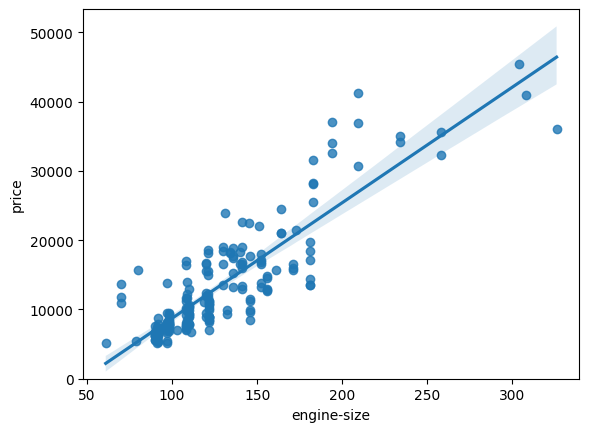

In [5]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [6]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-L/100km', ylabel='price'>

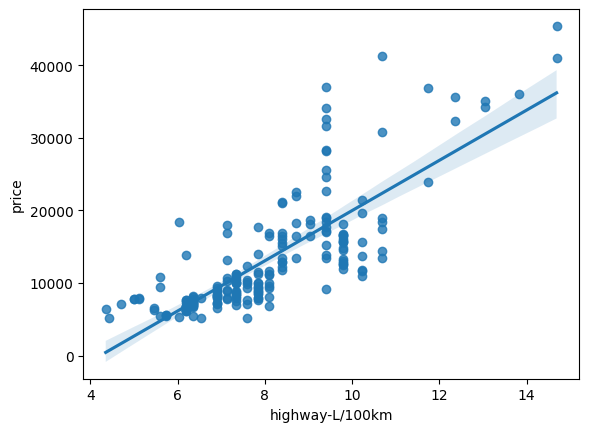

In [7]:
sns.regplot(x="highway-L/100km", y="price", data=df)

<Axes: xlabel='body-style', ylabel='price'>

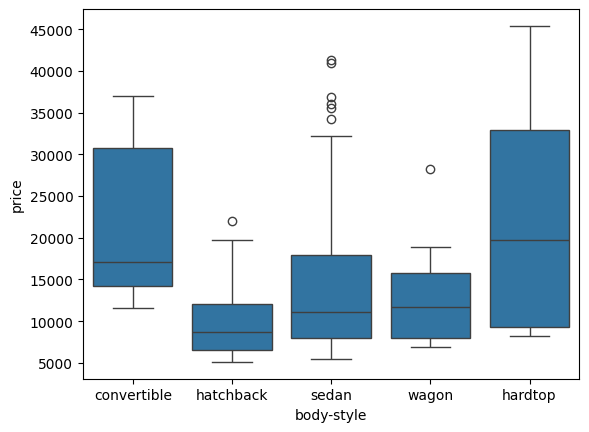

In [8]:
sns.boxplot(x="body-style",y="price",data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

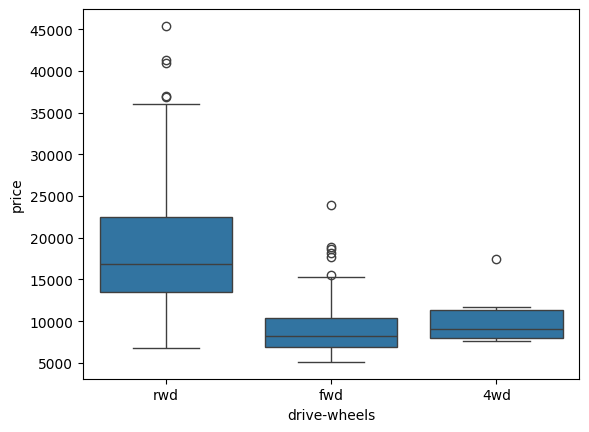

In [9]:
sns.boxplot(x="drive-wheels",y="price",data=df)

In [10]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


In [11]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [12]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [13]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [14]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [15]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [16]:
#grouping
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
df_test=df[['drive-wheels','price']]
df_grp=df_test.groupby(['drive-wheels'],as_index=False).mean()
df_grp

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [21]:
df_test = df[['drive-wheels','body-style', 'price']]  # Exclude 'body-style' as it is non-numeric
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [23]:
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [24]:
df_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

C:\Users\khush\AppData\Local\Temp\ipykernel_13964\2834859576.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


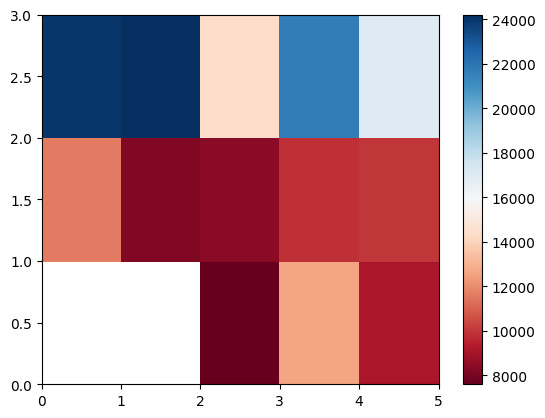

In [26]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [31]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


In [33]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.92400102759337e-48
The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64
